In [1]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Set the seed for reproducibility
seed = 42

# Define the base directory where the data is stored
base_dir = r'E:\Disaster\AIDER'

# Create directories for the split dataset if not already created
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# List the folders (categories) in the dataset
categories = ['collapsed_building', 'fire', 'flooded_areas', 'normal', 'traffic_incident']

# Split function to stratify and split each category folder
for category in categories:
    # Get the full path to each category
    category_path = os.path.join(base_dir, category)
    
    # Get all the files in the category folder
    files = os.listdir(category_path)
    
    # Create labels for stratification (all files in this folder belong to the same category)
    labels = [category] * len(files)

    # Split the files into train, val, and test
    train_files, test_val_files = train_test_split(files, test_size=0.3, random_state=seed, stratify=labels)
    val_files, test_files = train_test_split(test_val_files, test_size=0.5, random_state=seed, stratify=[category] * len(test_val_files))

    # Create category subdirectories for train, val, and test if not already created
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)
    
    # Move the files to the appropriate directories
    for file in train_files:
        shutil.move(os.path.join(category_path, file), os.path.join(train_dir, category, file))
    
    for file in val_files:
        shutil.move(os.path.join(category_path, file), os.path.join(val_dir, category, file))
    
    for file in test_files:
        shutil.move(os.path.join(category_path, file), os.path.join(test_dir, category, file))

print("Dataset split complete.")

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Dataset split complete.


In [2]:
import os

# Define the base directory where the split data is stored
base_dir = r'E:\Disaster\AIDER'

# List the folders (categories) in the dataset
categories = ['collapsed_building', 'fire', 'flooded_areas', 'normal', 'traffic_incident']

# Function to print file counts for train, val, test
def print_file_counts(split_dir, categories):
    print(f"File counts for {split_dir} split:\n")
    for category in categories:
        category_path = os.path.join(base_dir, split_dir, category)
        
        # Check if the directory exists and contains files
        if os.path.exists(category_path):
            files = os.listdir(category_path)
            print(f"Class: {category}")
            print(f"  Path: {category_path}")
            print(f"  File count: {len(files)}\n")
        else:
            print(f"Class: {category} - No files found in {split_dir} split\n")

# Check and print file counts for train, val, and test directories
print_file_counts('train', categories)
print_file_counts('val', categories)
print_file_counts('test', categories)

File counts for train split:

Class: collapsed_building
  Path: E:\Disaster\AIDER\train\collapsed_building
  File count: 357

Class: fire
  Path: E:\Disaster\AIDER\train\fire
  File count: 364

Class: flooded_areas
  Path: E:\Disaster\AIDER\train\flooded_areas
  File count: 368

Class: normal
  Path: E:\Disaster\AIDER\train\normal
  File count: 3073

Class: traffic_incident
  Path: E:\Disaster\AIDER\train\traffic_incident
  File count: 339

File counts for val split:

Class: collapsed_building
  Path: E:\Disaster\AIDER\val\collapsed_building
  File count: 77

Class: fire
  Path: E:\Disaster\AIDER\val\fire
  File count: 78

Class: flooded_areas
  Path: E:\Disaster\AIDER\val\flooded_areas
  File count: 79

Class: normal
  Path: E:\Disaster\AIDER\val\normal
  File count: 658

Class: traffic_incident
  Path: E:\Disaster\AIDER\val\traffic_incident
  File count: 73

File counts for test split:

Class: collapsed_building
  Path: E:\Disaster\AIDER\test\collapsed_building
  File count: 77

Clas

In [3]:
import os
import numpy as np
import pickle
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

def preprocess_images(data_dir, img_size):
    images = []
    labels = []

    for label in os.listdir(data_dir):
        label_path = os.path.join(data_dir, label)
        
        for image_file in tqdm(os.listdir(label_path)):
            image_path = os.path.join(label_path, image_file)
            
            img = load_img(image_path, target_size=img_size)
            img_array = img_to_array(img)
            
            img_array /= 255.0
            
            images.append(img_array)
            labels.append(label)  # Keep the label as a string for categorization

    return np.array(images), np.array(labels)

def create_data_arrays(base_dir, img_size, output_dir, split):
    # Select directory based on the split
    split_dir = os.path.join(base_dir, split)
    
    if not os.path.exists(split_dir):
        print(f"Directory {split_dir} not found!")
        return

    images, labels = preprocess_images(split_dir, img_size)
    
    # Shuffle data
    indices = np.arange(len(images))
    np.random.seed(45)
    np.random.shuffle(indices)
    images = images[indices]
    labels = labels[indices]

    print(f"{split.capitalize()} images shape: {images.shape}")
    print(f"{split.capitalize()} labels shape: {labels.shape}")
    
    # Save the data for the specified split
    with open(os.path.join(output_dir, f'{split}_data.pkl'), 'wb') as f:
        pickle.dump((images, labels), f)

    print(f"{split.capitalize()} data has been saved successfully.")

In [4]:
img_size = (256, 256)
base_dir = r'E:\Disaster\AIDER'
output_dir =r'E:\Disaster\AIDER\pickle'

create_data_arrays(base_dir, img_size, output_dir, split='train')

100%|██████████| 339/339 [00:03<00:00, 85.54it/s]


Train images shape: (4501, 256, 256, 3)
Train labels shape: (4501,)
Train data has been saved successfully.


In [5]:
create_data_arrays(base_dir, img_size, output_dir, split='val')

100%|██████████| 73/73 [00:00<00:00, 88.06it/s] 


Val images shape: (965, 256, 256, 3)
Val labels shape: (965,)
Val data has been saved successfully.


In [6]:
create_data_arrays(base_dir, img_size, output_dir, split='test')

100%|██████████| 73/73 [00:00<00:00, 94.52it/s]


Test images shape: (967, 256, 256, 3)
Test labels shape: (967,)
Test data has been saved successfully.


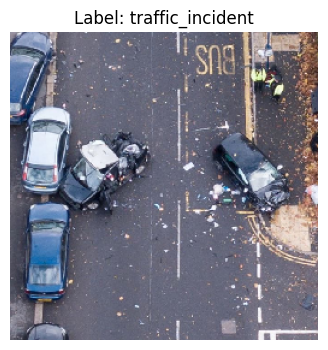

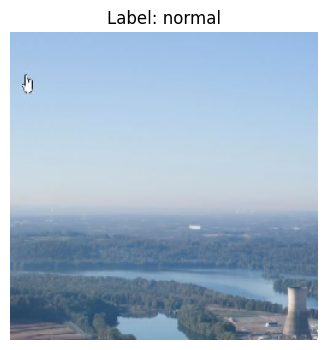

In [8]:
import pickle
import matplotlib.pyplot as plt

# Function to load pickle files
def load_pickle(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    return data

# Function to display images and their labels
def display_images(images, labels, num_images=2):
    for i in range(num_images):
        plt.figure(figsize=(4, 4))
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
        plt.show()

# Load data for 'train', 'val', or 'test' split
split = 'train'  # Change this to 'val' or 'test' as needed
file_path = f'E:\Disaster\AIDER\pickle\{split}_data.pkl'

# Load the data
images, labels = load_pickle(file_path)

# Display the first 2 images (change num_images as needed)
display_images(images, labels, num_images=2)